# Question: Given a plot of a story find out which genre it belongs


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import string
import texthero as hero
from wordcloud.wordcloud import WordCloud

In [122]:
movieDetails = pd.read_json('./IMDB_movie_details.json', lines=True)
# print(movieDetails["plot_synopsis"][0])
movieDetails.head()

movie_id                                       plot_summary  duration  \
0  tt0105112  Former CIA analyst, Jack Ryan is in England wi...  1h 57min   
1  tt1204975  Billy (Michael Douglas), Paddy (Robert De Niro...  1h 45min   
2  tt0243655  The setting is Camp Firewood, the year 1981. I...  1h 37min   
3  tt0040897  Fred C. Dobbs and Bob Curtin, both down on the...   2h 6min   
4  tt0126886  Tracy Flick is running unopposed for this year...  1h 43min   

                         genre  rating release_date  \
0           [Action, Thriller]     6.9   1992-06-05   
1                     [Comedy]     6.6   2013-11-01   
2            [Comedy, Romance]     6.7   2002-04-11   
3  [Adventure, Drama, Western]     8.3   1948-01-24   
4     [Comedy, Drama, Romance]     7.3   1999-05-07   

                                       plot_synopsis  
0  Jack Ryan (Ford) is on a "working vacation" in...  
1  Four boys around the age of 10 are friends in ...  
2                                                     
3  Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...  
4  Jim McAllister (Matthew Broderick) is a much-a...

In [123]:
# movieReviews = pd.read_json('./IMDB_reviews.json', lines=True)
# movieReviews.head()

In [124]:
print("Movie shape: ",movieDetails.shape)
print("Null values: ",movieDetails.isnull().values.any())

# movieDetails[movieDetails["plot_synopsis"].notna()]
movieDetails["plot_synopsis"].notna().unique()
print(type(movieDetails["plot_synopsis"][2]))

Movie shape:  (1572, 7)
Null values:  False
<class 'str'>


# visualizing the dataset

### visual 1 -> counts per rating

Text(0.5, 1.0, 'Counts per rating')

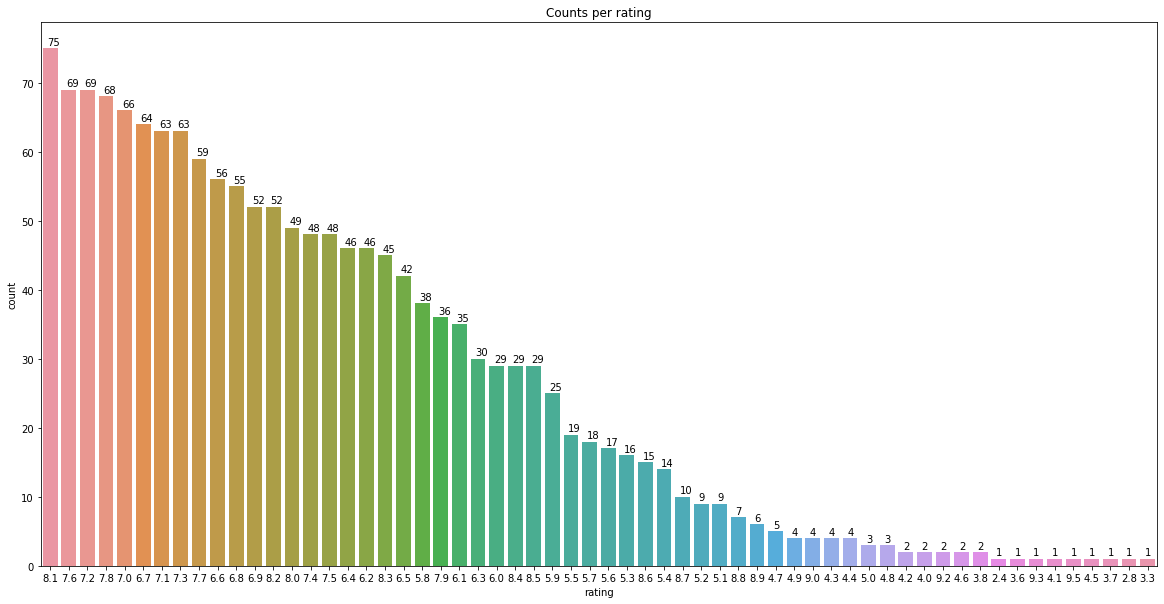

In [126]:
plt.figure(figsize=(20,10))

ax = sns.countplot(x=movieDetails["rating"],  data=movieDetails, order = movieDetails["rating"].value_counts().index )
for p, label in zip(ax.patches, movieDetails["rating"].value_counts()):
#     print(p)
#     print(label)
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))
ax.set_title('Counts per rating')

In [127]:
#below shows us each movie is only mentioned once
movieDetails.groupby("movie_id").count().describe()


plot_summary  duration   genre  rating  release_date  plot_synopsis
count        1572.0    1572.0  1572.0  1572.0        1572.0         1572.0
mean            1.0       1.0     1.0     1.0           1.0            1.0
std             0.0       0.0     0.0     0.0           0.0            0.0
min             1.0       1.0     1.0     1.0           1.0            1.0
25%             1.0       1.0     1.0     1.0           1.0            1.0
50%             1.0       1.0     1.0     1.0           1.0            1.0
75%             1.0       1.0     1.0     1.0           1.0            1.0
max             1.0       1.0     1.0     1.0           1.0            1.0

[Action, Adventure, Sci-Fi]    68
[Comedy, Drama, Romance]       58
[Drama, Romance]               50
[Comedy]                       49
[Drama]                        49
                               ..
[Comedy, Drama, Sport]          1
[Adventure, Sci-Fi]             1
[Drama, Fantasy, Mystery]       1
[Biography, Drama, Family]      1
[Action, Comedy, Thriller]      1
Name: genre, Length: 237, dtype: int64


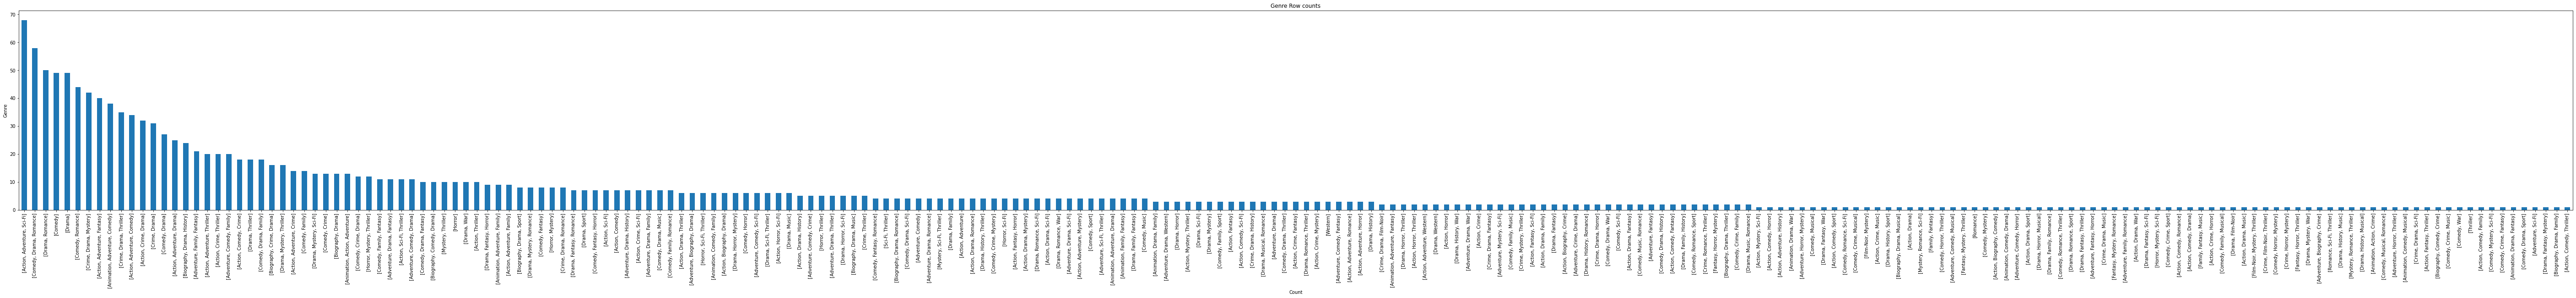

In [128]:
print(movieDetails["genre"].value_counts())
movieDetails["genre"].value_counts().plot(kind="bar",figsize=(100,8))
plt.title("Genre Row counts")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

In [130]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

## change function names

In [131]:
def make_bigrams(texts): #from course notes
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):#from course notes
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def remove_Stopwords(text ):
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize( text.lower() ) 
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)
    
#lemmatization and tokenization
def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

#for removing punctuations
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    
    return text2.lower()

In [132]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### cleaning the plot_synopsis column

In [133]:
movieDetails["plot_synopsis"] = movieDetails["plot_synopsis"].apply(clean_text)
movieDetails["plot_synopsis"] = movieDetails["plot_synopsis"].apply(remove_Stopwords)
movieDetails["plot_synopsis"] = movieDetails["plot_synopsis"].apply(lemmatize_text)
movieDetails["plot_synopsis"]

0       jack ryan ford working vacation london family ...
1       four boy around age 10 friend brooklyn 50 nick...
2                                                        
3       fred dobbs humphrey bogart bob curtin tim holt...
4       jim mcallister matthew broderick muchadmired h...
                              ...                        
1567    year 1998 evan treborn ashton kutcher suffered...
1568    brandon michael fassbender successful handsome...
1569    film alternate three different period time inv...
1570                                                     
1571                                                     
Name: plot_synopsis, Length: 1572, dtype: object

### cleaning the plot_summary column

In [134]:
movieDetails["plot_summary"] = movieDetails["plot_summary"].apply(clean_text)
movieDetails["plot_summary"] = movieDetails["plot_summary"].apply(remove_Stopwords)
movieDetails["plot_summary"] = movieDetails["plot_summary"].apply(lemmatize_text)
movieDetails["plot_summary"]

0       former cia analyst jack ryan england family va...
1       billy michael douglas paddy robert de niro arc...
2       setting camp firewood year 1981 last day every...
3       fred c dobbs bob curtin luck tampico mexico 19...
4       tracy flick running unopposed year high school...
                              ...                        
1567    evan treborn grows small town single working m...
1568    brandon 30something man living new york unable...
1569    evacuation allied soldier british empire franc...
1570    beautiful 24yearold diana bruni who happily ma...
1571    marriage david burgess senior executive beauti...
Name: plot_summary, Length: 1572, dtype: object

In [242]:
movieDetails['num_words'] = movieDetails['plot_synopsis'].apply(lambda x:len(str(x).split())) 

desc = movieDetails['num_words'].describe()
print(desc)

count    1572.000000
mean      781.980916
std       800.601270
min         0.000000
25%       273.750000
50%       590.500000
75%      1036.000000
max      6113.000000
Name: num_words, dtype: float64


In [136]:
# print(movieDetails['rating'].median())
# median = movieDetails['rating'].median()

In [137]:
# lower_ratings = movieDetails[movieDetails['rating'] < median]
# higher_ratings = movieDetails[movieDetails['rating'] > median]
# lower_ratings

### Most used words within the plot_summary column

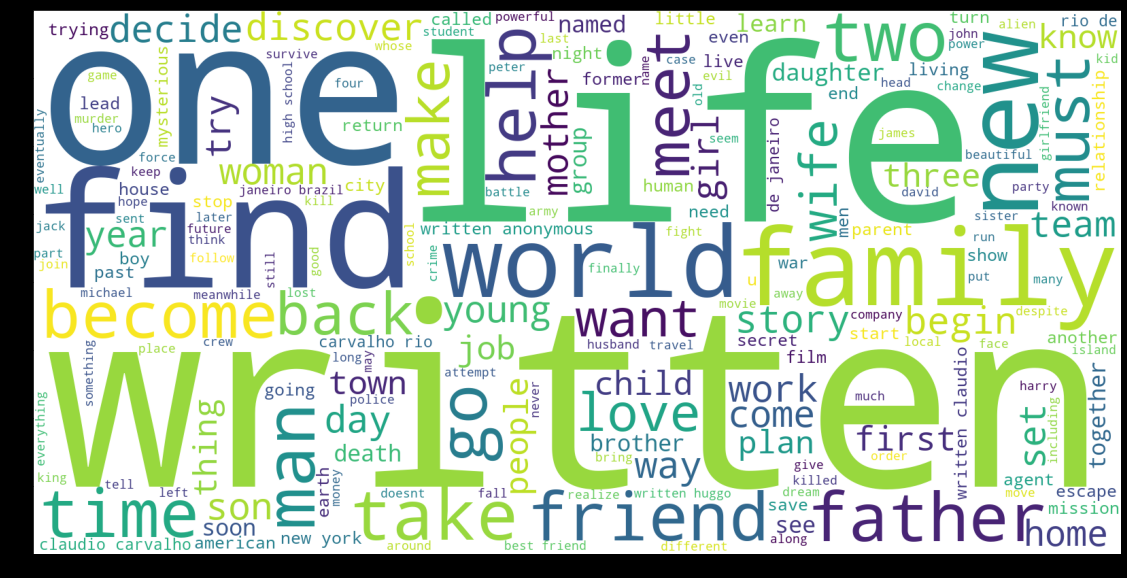

In [138]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(movieDetails['plot_summary'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

In [139]:
# the plot summary seemed to have more noun words as compared to the plot synopsis

## experimentation begins

In [140]:
# !pip install scikit-multilearn

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer #used for multi label classification
from sklearn.model_selection import train_test_split

#machine learning algorithms
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import MultinomialNB



#we use the below because we will be using the logistic regression and multilabel binarizer
from sklearn.multiclass import OneVsRestClassifier # will do a classification of one class vs another(multiclass/multi label strategy)

In [142]:
movieDetails.head()
# print("genre type: ",type(movieDetails["genre"][0][0]))

movie_id                                       plot_summary  duration  \
0  tt0105112  former cia analyst jack ryan england family va...  1h 57min   
1  tt1204975  billy michael douglas paddy robert de niro arc...  1h 45min   
2  tt0243655  setting camp firewood year 1981 last day every...  1h 37min   
3  tt0040897  fred c dobbs bob curtin luck tampico mexico 19...   2h 6min   
4  tt0126886  tracy flick running unopposed year high school...  1h 43min   

                         genre  rating release_date  \
0           [Action, Thriller]     6.9   1992-06-05   
1                     [Comedy]     6.6   2013-11-01   
2            [Comedy, Romance]     6.7   2002-04-11   
3  [Adventure, Drama, Western]     8.3   1948-01-24   
4     [Comedy, Drama, Romance]     7.3   1999-05-07   

                                       plot_synopsis  num_words  
0  jack ryan ford working vacation london family ...        850  
1  four boy around age 10 friend brooklyn 50 nick...        521  
2                                                             0  
3  fred dobbs humphrey bogart bob curtin tim holt...        271  
4  jim mcallister matthew broderick muchadmired h...        891

## one hot encoding the targets

In [143]:
multilabel = MultiLabelBinarizer() #need to create a multilabelbinarizer object.

In [144]:
y = multilabel.fit_transform(movieDetails["genre"])
# pd.DataFrame(y)
print("Document Term matrix of the genres")
pd.DataFrame(y,columns=multilabel.classes_) #multilabel classifiers expect such

Document Term matrix of the genres


Action  Adventure  Animation  Biography  Comedy  Crime  Drama  Family  \
0          1          0          0          0       0      0      0       0   
1          0          0          0          0       1      0      0       0   
2          0          0          0          0       1      0      0       0   
3          0          1          0          0       0      0      1       0   
4          0          0          0          0       1      0      1       0   
...      ...        ...        ...        ...     ...    ...    ...     ...   
1567       0          0          0          0       0      0      0       0   
1568       0          0          0          0       0      0      1       0   
1569       1          0          0          0       0      0      1       0   
1570       0          0          0          0       1      0      1       0   
1571       0          0          0          0       0      0      1       0   

      Fantasy  Film-Noir  ...  Horror  Music  Musical  Mystery  Romance  \
0           0          0  ...       0      0        0        0        0   
1           0          0  ...       0      0        0        0        0   
2           0          0  ...       0      0        0        0        1   
3           0          0  ...       0      0        0        0        0   
4           0          0  ...       0      0        0        0        1   
...       ...        ...  ...     ...    ...      ...      ...      ...   
1567        0          0  ...       0      0        0        0        0   
1568        0          0  ...       0      0        0        0        0   
1569        0          0  ...       0      0        0        0        0   
1570        0          0  ...       0      0        0        0        0   
1571        0          0  ...       0      0        0        0        0   

      Sci-Fi  Sport  Thriller  War  Western  
0          0      0         1    0        0  
1          0      0         0    0        0  
2          0      0         0    0        0  
3          0      0         0    0        1  
4          0      0         0    0        0  
...      ...    ...       ...  ...      ...  
1567       1      0         1    0        0  
1568       0      0         0    0        0  
1569       0      0         0    0        0  
1570       0      0         0    0        0  
1571       0      0         1    0        0  

[1572 rows x 21 columns]

In [145]:
# colors = cm.rainbow(np.linspace(0, 1, 21))
# colors

['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Drama'
 'Family' 'Fantasy' 'Film-Noir' 'History' 'Horror' 'Music' 'Musical'
 'Mystery' 'Romance' 'Sci-Fi' 'Sport' 'Thriller' 'War' 'Western']
[438 433  84 101 525 302 799 155 178   6  58 116  34  12 161 237 188  30
 233  25  10]


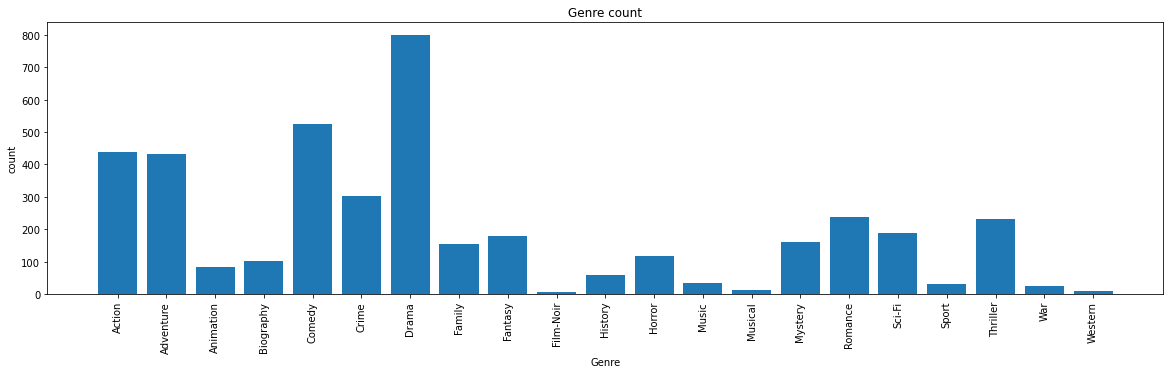

In [146]:
sum_column = y.sum(axis=0)
print(multilabel.classes_)
print (sum_column)
plt.figure(figsize=(20,5))
plt.bar(multilabel.classes_,sum_column)
plt.xticks(rotation=90)
plt.title("Genre count")
plt.xlabel("Genre")
plt.ylabel("count")
plt.show()


In [147]:
print("No of classes: {} i.e {} ".format(len(multilabel.classes_), multilabel.classes_))

No of classes: 21 i.e ['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Drama'
 'Family' 'Fantasy' 'Film-Noir' 'History' 'Horror' 'Music' 'Musical'
 'Mystery' 'Romance' 'Sci-Fi' 'Sport' 'Thriller' 'War' 'Western'] 


# TFIDF

statistical measure that evaluates how relevant a word is to a document 

## plot summary TFIDF

In [148]:
tfidf = TfidfVectorizer(analyzer="word",max_features=5000, ngram_range=(1,1), stop_words="english")#if word is selected, tokenization will be done word by word, if char is selected ....

In [149]:
# TfidfVectorizer -> term frequency multiplication with inverse document frequency
sum_tfidf = tfidf.fit_transform(movieDetails["plot_summary"]).toarray()
# print("plot_summary TFIDF")
# pd.DataFrame(sum_tfidf)
###...................................... try using count vectorizer

## plot synopsis TFIDF

In [150]:
# TfidfVectorizer -> term frequency multiplication with inverse document frequency
syn_tfidf = tfidf.fit_transform(movieDetails["plot_synopsis"]).toarray()
# print("plot_synopsis TFIDF")
# pd.DataFrame(syn_tfidf)

# bag of words

In [257]:
movieDetails["plot_summary"]

0       former cia analyst jack ryan england family va...
1       billy michael douglas paddy robert de niro arc...
2       setting camp firewood year 1981 last day every...
3       fred c dobbs bob curtin luck tampico mexico 19...
4       tracy flick running unopposed year high school...
                              ...                        
1567    evan treborn grows small town single working m...
1568    brandon 30something man living new york unable...
1569    evacuation allied soldier british empire franc...
1570    beautiful 24yearold diana bruni who happily ma...
1571    marriage david burgess senior executive beauti...
Name: plot_summary, Length: 1572, dtype: object

In [258]:
from sklearn.feature_extraction.text import CountVectorizer

In [259]:
cv = CountVectorizer()

In [261]:
bow = cv.fit_transform(movieDetails["plot_summary"]).toarray()
pd.DataFrame(bow)

0      1      2      3      4      5      6      7      8      9      \
0         0      0      0      0      0      0      0      0      0      0   
1         0      0      0      0      0      0      0      0      0      0   
2         0      0      0      0      0      0      0      0      0      0   
3         0      0      0      0      0      0      0      0      0      0   
4         0      0      0      0      0      0      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1567      0      0      0      0      0      0      0      0      0      0   
1568      0      0      0      0      0      0      0      0      0      0   
1569      0      0      1      0      0      0      0      0      0      0   
1570      0      0      0      0      0      0      0      0      0      0   
1571      0      0      0      0      0      0      0      0      0      0   

      ...  16364  16365  16366  16367  16368  16369  16370  16371  16372  \
0     ...      0      0      0      0      0      0      0      0      0   
1     ...      0      0      0      0      0      0      0      0      0   
2     ...      0      0      0      0      0      0      0      0      0   
3     ...      0      0      0      0      0      0      0      0      0   
4     ...      0      0      0      0      0      0      0      0      0   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1567  ...      0      0      0      0      0      0      0      0      0   
1568  ...      0      0      0      0      0      0      0      0      0   
1569  ...      0      0      0      0      0      0      0      0      0   
1570  ...      0      0      0      0      0      0      0      0      0   
1571  ...      0      0      0      0      0      0      0      0      0   

      16373  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
1567      0  
1568      0  
1569      0  
1570      0  
1571      0  

[1572 rows x 16374 columns]

# word2vec


## select value of X 

the below tab alows you to switch between bag of words, tfidf and ...

In [262]:
# x = sum_tfidf #TFIDF
x = bow #BAG OF WORDS
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [263]:
print(x.shape, y.shape)

(1572, 16374) (1572, 21)


## splitting test and train data

The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2. Hence we will have to move on with the unbalanced dataset

In [264]:
from sklearn.model_selection import train_test_split


In [265]:
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, stratify=y,random_state=30)#X is feature, y is target,stratify will make sure we divide an equal ratio in train and test data sample

In [266]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=30)#X is feature, y is target,stratify will make sure we divide an equal ratio in train and test data sample

## plotting the Train and Test dataset labels

['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Drama'
 'Family' 'Fantasy' 'Film-Noir' 'History' 'Horror' 'Music' 'Musical'
 'Mystery' 'Romance' 'Sci-Fi' 'Sport' 'Thriller' 'War' 'Western']
[309 298  58  71 364 204 557 118 133   3  37  77  27  10 109 183 122  21
 163  17   5]


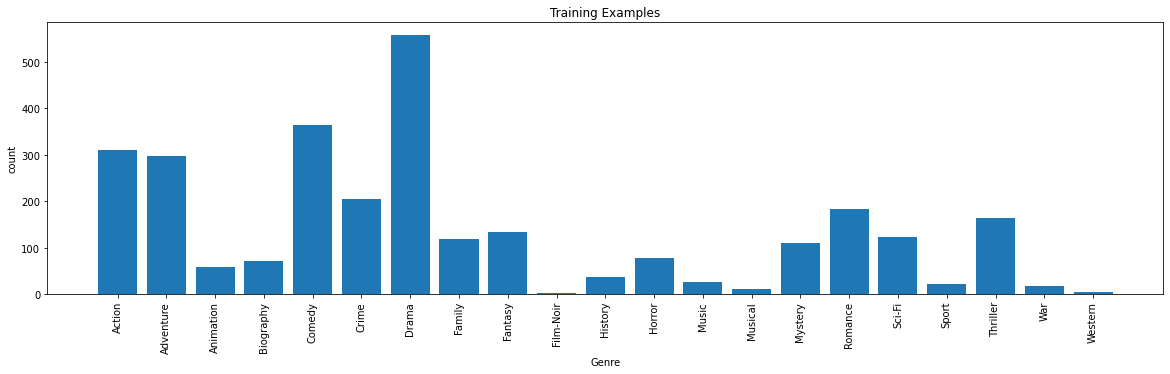

In [267]:
# pd.DataFrame(y_test,columns=multilabel.classes_)
sum_column = y_train.sum(axis=0)
print(multilabel.classes_)
print (sum_column)
plt.figure(figsize=(20,5))
plt.bar(multilabel.classes_,sum_column)
plt.xticks(rotation=90)
plt.title("Training Examples")
plt.xlabel("Genre")
plt.ylabel("count")
plt.show()

['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Drama'
 'Family' 'Fantasy' 'Film-Noir' 'History' 'Horror' 'Music' 'Musical'
 'Mystery' 'Romance' 'Sci-Fi' 'Sport' 'Thriller' 'War' 'Western']
[129 135  26  30 161  98 242  37  45   3  21  39   7   2  52  54  66   9
  70   8   5]


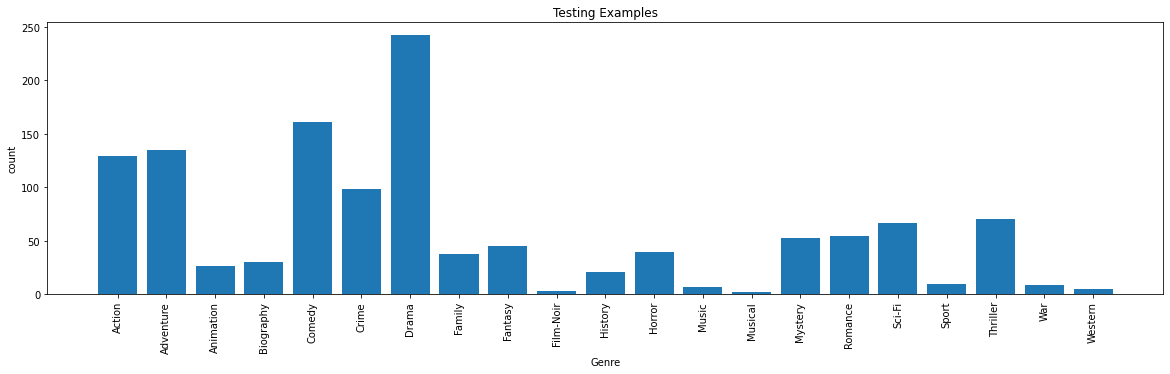

In [268]:
sum_column = y_test.sum(axis=0)
print(multilabel.classes_)
print (sum_column)
plt.figure(figsize=(20,5))
plt.bar(multilabel.classes_,sum_column)
plt.xticks(rotation=90)
plt.title("Testing Examples")
plt.xlabel("Genre")
plt.ylabel("count")
plt.show()

### confusion matrix declaration

In [269]:
from sklearn.metrics import confusion_matrix

In [270]:
def confusionmatrix(y_test,y_pred,model_name,color="Blues"):
    mat = confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))
    sns.heatmap(mat,annot=True, cmap=color)
    plt.title(model_name)
    plt.xlabel("True Label")
    plt.ylabel("predicted label")
    #plt.savefig("confmat.png")
    plt.show()
    return
    

## Accuracy functions


In [271]:
#accuracy scores
from sklearn.metrics import accuracy_score,hamming_loss

In [272]:
def j_score(y_true,y_pred): #to help us know how the model is performing
    jaccard = np.minimum(y_true,y_pred).sum(axis=1)/np.maximum(y_true,y_pred).sum(axis=1)
    return jaccard.mean()*100

def ham_loss(y_true,y_pred): #need to find the name(not working for some reason)
    hamn_loss = hamming_loss(y_true,y_pred)
    return hamn_loss

def a_score(y_true,y_pred): #need to find the name(not working for some reason)
    default_accuracy = accuracy_score(y_true,y_pred)
    return default_accuracy*100

def print_score(y_pred,clf):
    print("*"*50)
    print("model: ** {} **".format(clf.__class__.__name__))
    print("")    
    print("Jaccard Score: {}".format(j_score(y_test,y_pred)))
    print("Hamming Loss: {}".format(ham_loss(y_test,y_pred))) #the smaller the better

## Modeling and Evaluation

here we train and test the models. Accuracy is measured using the jaccard score, hamming loss, and scikitlearns score method(for both train and test) 

In [273]:
sgd = SGDClassifier()#stochastic gradient descent algorithm
lr = LogisticRegression(solver="lbfgs") #the lbfgs is the algorithm to use in the optimization problem(for multiclass problems)
svc = LinearSVC()
mNB = BinaryRelevance(MultinomialNB()) #we wrap the model into an sklearn multilabel class estimator

**************************************************
model: ** SGDClassifier **

Jaccard Score: 33.84887005649717
Hamming Loss: 0.10905972558514931
Train accuracy score : 99.54545454545455
Test accuracy score: 8.26271186440678


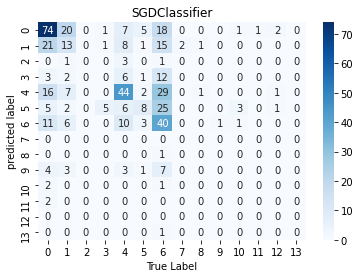

**************************************************
model: ** LogisticRegression **

Jaccard Score: 34.40677966101695
Hamming Loss: 0.10139225181598063
Train accuracy score : 100.0
Test accuracy score: 9.957627118644067


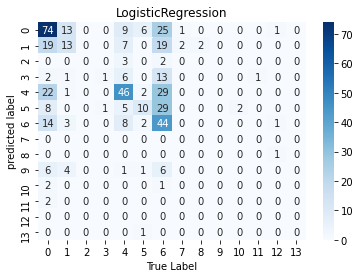

**************************************************
model: ** LinearSVC **

Jaccard Score: 36.5430790960452
Hamming Loss: 0.1053268765133172
Train accuracy score : 100.0
Test accuracy score: 11.016949152542372


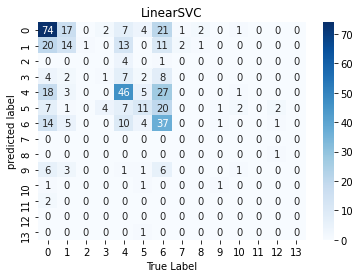

**************************************************
model: ** MultinomialNB **

Jaccard Score: 38.74577047246539
Hamming Loss: 0.10320823244552058
Train accuracy score : 78.0909090909091
Test accuracy score: 9.957627118644067


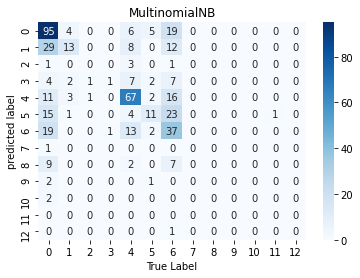

In [283]:
for classifier in [sgd,lr,svc,mNB.classifier]:
    clf = OneVsRestClassifier(classifier) #out of the 20 classes it will select 1 at a time and the other 19 as all other classes and will do the same for every data 
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print_score(y_pred,classifier)
    print("Train accuracy score :",clf.score(x_train,y_train)*100)
    print("Test accuracy score: {}".format(a_score(y_test,y_pred)))
    confusionmatrix(y_test,y_pred,classifier.__class__.__name__)
    

## Best Model

The SGDClassifier showed to have the best accuracy on most of the metrics used

In [277]:
clf = OneVsRestClassifier(sgd) #used previously
# clf = OneVsRestClassifier(CalibratedClassifierCV(sgd))
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print_score(y_pred,sgd)
print("Train accuracy score :",clf.score(x_train,y_train)*100)
print("Test accuracy score: {}".format(a_score(y_test,y_pred)))

# model = 

# model.fit(X, y)
# model.predict_proba(X)

**************************************************
model: ** SGDClassifier **

Jaccard Score: 33.711158192090394
Hamming Loss: 0.10774818401937046
Train accuracy score : 99.72727272727273
Test accuracy score: 7.838983050847458


## Compute ROC curve and ROC area for each label
ROC curves are typically used in binary classification to study the output of a classifier. In order to extend ROC curve and ROC area to multi-label classification. One ROC curve can be drawn per label

In [275]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i,cls in enumerate(multilabel.classes_):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

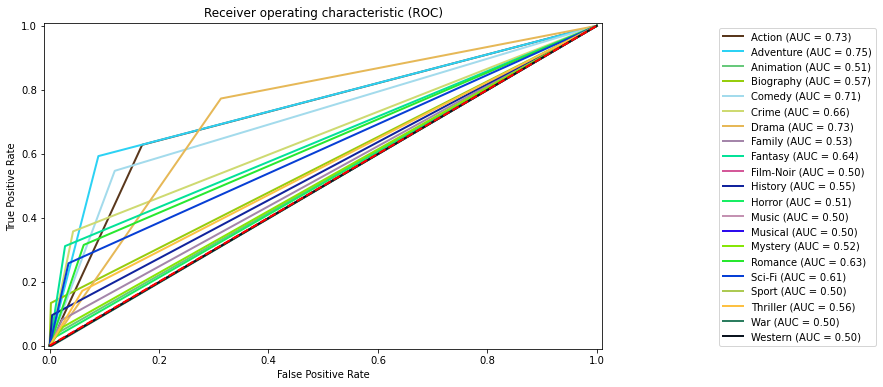

In [276]:
plt.figure(figsize=(10, 6))
lw = 2

for j,cls in enumerate(multilabel.classes_):
    
    r = random.random()
    b = random.random()
    g = random.random()
    
    plt.plot(fpr[j], tpr[j], color=(r, g, b),
         lw=lw, label=f'{cls} (AUC = %0.2f)' % roc_auc[j])
    



plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver operating characteristic (ROC)')

plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

plt.show()

# Confusion Matrix

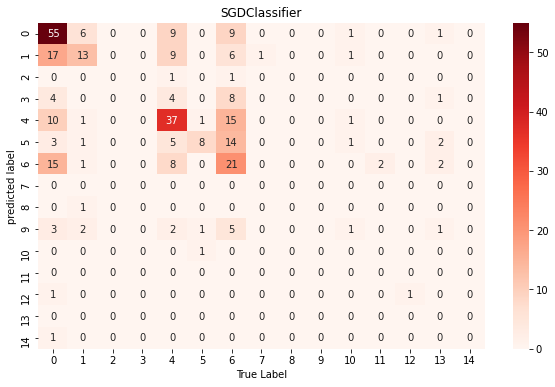

In [57]:
plt.figure(figsize=(10,6))
confusionmatrix(y_test,y_pred,sgd.__class__.__name__, "Reds")

## Classification Evaluation

In [278]:
from sklearn.metrics import classification_report

Recall: shows how many instances were identified correctly out of all the positive classes -> (Recall = TP/(TP+FN))
.
Precision:how many instances were predicted correctly out of all the predicted positive instances Precision=TP/(TP+FP)
.
F-Measure shows the harmonic mean of Precision and Recall. F-Score =(2 * Recall * Precision) / (Recall + Precision)

In [279]:
print(classification_report(y_test,y_pred,target_names=multilabel.classes_))

              precision    recall  f1-score   support

      Action       0.59      0.50      0.54       129
   Adventure       0.73      0.46      0.56       135
   Animation       0.20      0.04      0.06        26
   Biography       0.00      0.00      0.00        30
      Comedy       0.65      0.42      0.51       161
       Crime       0.73      0.24      0.37        98
       Drama       0.64      0.67      0.65       242
      Family       0.29      0.11      0.16        37
     Fantasy       0.62      0.33      0.43        45
   Film-Noir       0.00      0.00      0.00         3
     History       0.00      0.00      0.00        21
      Horror       0.33      0.05      0.09        39
       Music       0.00      0.00      0.00         7
     Musical       0.00      0.00      0.00         2
     Mystery       0.56      0.17      0.26        52
     Romance       0.55      0.31      0.40        54
      Sci-Fi       0.76      0.33      0.46        66
       Sport       1.00    

/home/egichuki/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/egichuki/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



## save the model to disk

In [60]:
import pickle

In [61]:
#9.2%
filename = 'best_model.model'
pickle.dump(clf, open(filename, 'wb'))

# Testing 

### load the model from disk

In [62]:
best_model = pickle.load(open(filename, 'rb'))

In [63]:
result = best_model.score(x_test, y_test)
print("Model Accuracy: {:.2f}%".format(result*100))

Model Accuracy: 9.52%


In [64]:
#incase API doesnt work
# movie_plot = ["'Elite' presents three young people who have received a scholarship to study in Las Encinas, the most prestigious institute in Spain, after the collapse suffered by the public center in which they studied. However, their arrival in Las Encinas will not be easy, and the students, belonging to the upper class, will not welcome the arrival of Samuel, Nadia and Christian, who will turn upside down, without them wanting it, life of their schoolmates."]

In [65]:
from requests.auth import HTTPBasicAuth
import requests
import json

In [66]:
api_key = "112c829d"

## Enter movie title

In [67]:
movie_title = "elite"

In [68]:
# https://www.omdbapi.com/?apikey=112c829d&t=elite
url = f"https://www.omdbapi.com/?apikey={api_key}&t={movie_title}"
headers = {"Accept": "application/json"}
req = requests.get(url, headers=headers)
movie = json.loads(req.content.decode('utf-8'))

In [69]:
movie_plot = movie['Plot']
movie_plot

'When three working-class teenagers begin attending an exclusive private school in Spain, the clash between them and the wealthy students leads to murder.'

In [70]:
expected_output = movie["Genre"]
expected_output

'Crime, Drama, Thriller'

### preprocessing

In [71]:
mp = []
mp.append(movie_plot)
mp

['When three working-class teenagers begin attending an exclusive private school in Spain, the clash between them and the wealthy students leads to murder.']

In [280]:
# xt = tfidf.transform(mp).toarray()
xt = cv.fit_transform(mp).toarray()
# xt
# pd.DataFrame(xt)


## predicted output

In [281]:
#predicting from the stored model

arr = best_model.predict(xt)
pd.DataFrame(arr,columns=multilabel.classes_)
multilabel.inverse_transform(arr)

ValueError: X has 23 features per sample; expecting 5000

In [282]:
#predicting from the volatile model

arr = clf.predict(xt)
pd.DataFrame(arr,columns=multilabel.classes_)
multilabel.inverse_transform(clf.predict(xt))

ValueError: X has 23 features per sample; expecting 16374

# Experiment 2 - Training the model using PCA columns

A more common way of speeding up a machine learning algorithm is by using Principal Component Analysis (PCA). If your learning algorithm is too slow because the input dimension being too high, then using PCA to speed it up can be a reasonable choice. This is probably the most common application of PCA. Another common application of PCA is for data visualization.

In [75]:
import texthero as hero

In [76]:
# syn_tfidf = (movieDetails["plot_synopsis"].pipe(hero.clean).pipe(hero.tfidf).pipe(hero.pca))#takes too long

In [77]:
new_x = pd.DataFrame(movieDetails[["plot_summary","genre"]])
new_x

plot_summary  \
0     former cia analyst jack ryan england family va...   
1     billy michael douglas paddy robert de niro arc...   
2     setting camp firewood year 1981 last day every...   
3     fred c dobbs bob curtin luck tampico mexico 19...   
4     tracy flick running unopposed year high school...   
...                                                 ...   
1567  evan treborn grows small town single working m...   
1568  brandon 30something man living new york unable...   
1569  evacuation allied soldier british empire franc...   
1570  beautiful 24yearold diana bruni who happily ma...   
1571  marriage david burgess senior executive beauti...   

                            genre  
0              [Action, Thriller]  
1                        [Comedy]  
2               [Comedy, Romance]  
3     [Adventure, Drama, Western]  
4        [Comedy, Drama, Romance]  
...                           ...  
1567           [Sci-Fi, Thriller]  
1568                      [Drama]  
1569     [Action, Drama, History]  
1570              [Comedy, Drama]  
1571            [Drama, Thriller]  

[1572 rows x 2 columns]

## Clean, tfidf, pca

In [78]:
#principal component analysis
new_x["summary_pca"] = (new_x["plot_summary"].pipe(hero.clean).pipe(hero.tfidf).pipe(hero.pca))
new_x

plot_summary  \
0     former cia analyst jack ryan england family va...   
1     billy michael douglas paddy robert de niro arc...   
2     setting camp firewood year 1981 last day every...   
3     fred c dobbs bob curtin luck tampico mexico 19...   
4     tracy flick running unopposed year high school...   
...                                                 ...   
1567  evan treborn grows small town single working m...   
1568  brandon 30something man living new york unable...   
1569  evacuation allied soldier british empire franc...   
1570  beautiful 24yearold diana bruni who happily ma...   
1571  marriage david burgess senior executive beauti...   

                            genre  \
0              [Action, Thriller]   
1                        [Comedy]   
2               [Comedy, Romance]   
3     [Adventure, Drama, Western]   
4        [Comedy, Drama, Romance]   
...                           ...   
1567           [Sci-Fi, Thriller]   
1568                      [Drama]   
1569     [Action, Drama, History]   
1570              [Comedy, Drama]   
1571            [Drama, Thriller]   

                                         summary_pca  
0       [-0.03621994622163349, 0.023963596206390873]  
1        [-0.0354749736407724, 0.022956790190705557]  
2      [0.0033920110858963503, -0.06511178676673378]  
3         [0.02311283200570914, 0.04239605723488596]  
4       [-0.05435244660068605, 0.012570191735818487]  
...                                              ...  
1567    [-0.1082583323682954, -0.018502072061660355]  
1568    [-0.041068125536100154, -0.1060075071117719]  
1569     [0.10566968300045064, -0.01590618887333962]  
1570  [-0.047315600359444654, -0.029097813689978706]  
1571   [-0.017478786491839583, 0.036363183281336815]  

[1572 rows x 3 columns]

In [79]:
# new_x["synopsis_pca"] = (movieDetails["plot_synopsis"].pipe(hero.clean).pipe(hero.tfidf).pipe(hero.pca))#takes too long

In [80]:

hero.scatterplot(new_x,"summary_pca",title="PCA plot")#add color="genre"#needs to be one dimension

In [81]:
pca_split = pd.DataFrame(new_x["summary_pca"].to_list(), columns=['x1','x2'])
pca_split

x1        x2
0    -0.036220  0.023964
1    -0.035475  0.022957
2     0.003392 -0.065112
3     0.023113  0.042396
4    -0.054352  0.012570
...        ...       ...
1567 -0.108258 -0.018502
1568 -0.041068 -0.106008
1569  0.105670 -0.015906
1570 -0.047316 -0.029098
1571 -0.017479  0.036363

[1572 rows x 2 columns]

In [82]:
new_x = pd.concat([new_x, pca_split], axis=1) # dont run twice
new_x

plot_summary  \
0     former cia analyst jack ryan england family va...   
1     billy michael douglas paddy robert de niro arc...   
2     setting camp firewood year 1981 last day every...   
3     fred c dobbs bob curtin luck tampico mexico 19...   
4     tracy flick running unopposed year high school...   
...                                                 ...   
1567  evan treborn grows small town single working m...   
1568  brandon 30something man living new york unable...   
1569  evacuation allied soldier british empire franc...   
1570  beautiful 24yearold diana bruni who happily ma...   
1571  marriage david burgess senior executive beauti...   

                            genre  \
0              [Action, Thriller]   
1                        [Comedy]   
2               [Comedy, Romance]   
3     [Adventure, Drama, Western]   
4        [Comedy, Drama, Romance]   
...                           ...   
1567           [Sci-Fi, Thriller]   
1568                      [Drama]   
1569     [Action, Drama, History]   
1570              [Comedy, Drama]   
1571            [Drama, Thriller]   

                                         summary_pca        x1        x2  
0       [-0.03621994622163349, 0.023963596206390873] -0.036220  0.023964  
1        [-0.0354749736407724, 0.022956790190705557] -0.035475  0.022957  
2      [0.0033920110858963503, -0.06511178676673378]  0.003392 -0.065112  
3         [0.02311283200570914, 0.04239605723488596]  0.023113  0.042396  
4       [-0.05435244660068605, 0.012570191735818487] -0.054352  0.012570  
...                                              ...       ...       ...  
1567    [-0.1082583323682954, -0.018502072061660355] -0.108258 -0.018502  
1568    [-0.041068125536100154, -0.1060075071117719] -0.041068 -0.106008  
1569     [0.10566968300045064, -0.01590618887333962]  0.105670 -0.015906  
1570  [-0.047315600359444654, -0.029097813689978706] -0.047316 -0.029098  
1571   [-0.017478786491839583, 0.036363183281336815] -0.017479  0.036363  

[1572 rows x 5 columns]

In [83]:
x_train,x_test,y_train,y_test = train_test_split(pca_split,y,test_size=0.2,random_state=30)#X is feature, y is target,stratify will make sure we divide an equal ratio in train and test data sample

In [84]:
x_train

x1        x2
936   0.106292 -0.011361
725   0.024149  0.011054
1447  0.066068  0.003130
240   0.023004  0.036190
721   0.022489 -0.013170
...        ...       ...
919  -0.012619  0.014118
1164  0.091879 -0.014400
500   0.015688 -0.031272
941   0.011278  0.025229
421   0.058508  0.024765

[1257 rows x 2 columns]

In [85]:
for classifier in [sgd,lr,svc]:
    clf = OneVsRestClassifier(classifier) #out of the 20 classes it will select 1 at a time and the other 19 as all other classes and will do the same for every data 
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print_score(y_pred,classifier)
    print("Train accuracy score :",clf.score(x_train,y_train)*100)
    print("Test accuracy score: {}".format(a_score(y_test,y_pred)))
#     confusionmatrix(y_test,y_pred,classifier.__class__.__name__)


**************************************************
model: ** SGDClassifier **

Jaccard Score: 24.761904761904763
Hamming Loss: 0.11670445956160241
Train accuracy score : 2.94351630867144
Test accuracy score: 3.8095238095238098
**************************************************
model: ** LogisticRegression **

Jaccard Score: 15.44973544973545
Hamming Loss: 0.12063492063492064
Train accuracy score : 2.4661893396976926
Test accuracy score: 2.857142857142857
**************************************************
model: ** LinearSVC **

Jaccard Score: 20.185185185185183
Hamming Loss: 0.11730914588057445
Train accuracy score : 2.704852824184566
Test accuracy score: 3.8095238095238098


## As the model performed poorly we will try another method

In [171]:
pd.DataFrame(y_pred)

0   1   2   3   4   5   6   7   8   9   ...  11  12  13  14  15  16  17  \
0     0   0   0   0   1   0   1   1   0   0  ...   0   0   0   0   0   0   0   
1     0   0   0   0   0   1   0   0   0   0  ...   0   0   0   0   0   0   0   
2     0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
3     0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
4     1   1   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
467   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
468   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
469   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
470   0   0   0   0   0   1   0   0   0   0  ...   0   0   0   0   0   0   0   
471   0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   

     18  19  20  
0     0   0   0  
1     0   0   0  
2     0   0   0  
3     0   0   0  
4     0   0   0  
..   ..  ..  ..  
467   0   0   0  
468   0   0   0  
469   0   0   0  
470   0   0   0  
471   0   0   0  

[472 rows x 21 columns]

In [172]:
pd.DataFrame(y_test)

0   1   2   3   4   5   6   7   8   9   ...  11  12  13  14  15  16  17  \
0     0   0   0   0   1   0   0   0   0   0  ...   0   0   0   0   1   0   0   
1     0   0   0   0   0   1   1   0   0   0  ...   0   0   0   1   0   0   0   
2     0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
3     0   1   0   0   0   0   1   0   1   0  ...   0   0   0   0   0   0   0   
4     1   1   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
467   0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   
468   1   0   0   0   1   1   0   0   0   0  ...   0   0   0   0   0   0   0   
469   0   0   0   0   0   0   1   0   0   0  ...   0   0   0   1   0   1   0   
470   0   0   0   0   1   0   1   0   0   0  ...   0   0   0   0   0   0   1   
471   1   0   0   0   0   1   1   0   0   0  ...   0   0   0   0   0   0   0   

     18  19  20  
0     0   0   0  
1     0   0   0  
2     0   0   0  
3     0   0   0  
4     0   0   0  
..   ..  ..  ..  
467   0   0   0  
468   0   0   0  
469   0   0   0  
470   0   0   0  
471   0   0   0  

[472 rows x 21 columns]

In [232]:
tpr

{0: array([0.        , 0.49612403, 1.        ]),
 1: array([0.        , 0.56296296, 1.        ]),
 2: array([0., 1.]),
 3: array([0., 1.]),
 4: array([0.        , 0.49068323, 1.        ]),
 5: array([0.       , 0.2755102, 1.       ]),
 6: array([0.        , 0.47933884, 1.        ]),
 7: array([0.       , 0.2972973, 1.       ]),
 8: array([0.        , 0.53333333, 1.        ]),
 9: array([0., 1.]),
 10: array([0., 1.]),
 11: array([0.        , 0.02564103, 1.        ]),
 12: array([0., 1.]),
 13: array([0., 1.]),
 14: array([0.        , 0.07692308, 1.        ]),
 15: array([0.        , 0.22222222, 1.        ]),
 16: array([0.        , 0.18181818, 1.        ]),
 17: array([0., 1.]),
 18: array([0.        , 0.08571429, 1.        ]),
 19: array([0., 1.]),
 20: array([0., 1.])}

In [233]:
roc_auc

{0: 0.6955838813930888,
 1: 0.7518078909770304,
 2: 0.5,
 3: 0.5,
 4: 0.6762097821094046,
 5: 0.6270599148750409,
 6: 0.6418433345310816,
 7: 0.6314072693383039,
 8: 0.752615144418423,
 9: 0.5,
 10: 0.5,
 11: 0.5116657784094273,
 12: 0.5,
 13: 0.5,
 14: 0.5336996336996337,
 15: 0.6003455608718767,
 16: 0.5872145096283027,
 17: 0.5,
 18: 0.5254442075337598,
 19: 0.5,
 20: 0.5}

In [236]:
# multilabel soln